<a href="https://colab.research.google.com/github/jblancoperez/fiap-desafio/blob/main/C%C3%B3pia_de_00_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

!pip install lazypredict

from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

arquivo = pd.read_csv('https://raw.githubusercontent.com/jblancoperez/fiap-desafio/main/solicitacoescredito.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [ ]:
#Remover transacaoes que nao passaram por analise de credito
statusvalidos = ['EmAnaliseDocumentacao','AguardandoAprovacao','DocumentacaoReprovada']
filtrado = arquivo.loc[arquivo['status'].isin(statusvalidos)]
filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           794 non-null    int64  
 1   razaoSocial                  794 non-null    object 
 2   nomeFantasia                 794 non-null    object 
 3   cnpjSemTraco                 794 non-null    object 
 4   maiorAtraso                  794 non-null    int64  
 5   margemBrutaAcumulada         794 non-null    float64
 6   percentualProtestos          630 non-null    float64
 7   primeiraCompra               774 non-null    object 
 8   prazoMedioRecebimentoVendas  794 non-null    int64  
 9   titulosEmAberto              794 non-null    float64
 10  valorSolicitado              794 non-null    float64
 11  status                       794 non-null    object 
 12  definicaoRisco               794 non-null    object 
 13  diferencaPercentual

In [ ]:
valores = arquivo[['percentualRisco','valorAprovado','valorSolicitado','margemBruta','primeiraCompra','scorePontualidade']]
valores.head(50)

,percentualRisco,valorAprovado,valorSolicitado,margemBruta,primeiraCompra,scorePontualidade
0,0.283019,50000.0,50000.0,0.0,2015-12-10T00:00:00,1.000000
1,0.000000,NaN,10000.0,NaN,2019-06-12T17:28:31,0.000000
2,0.283019,20000.0,20000.0,0.0,2019-11-27T00:00:00,1.000000
3,0.603774,15000.0,25000.0,0.0,2017-02-13T17:20:27,0.000000
4,0.169811,50000.0,50000.0,81459809.0,2010-07-13T00:00:00,1.000000
5,0.377358,20000.0,25000.0,0.0,2019-06-28T10:25:57,0.000000
6,0.415094,80000.0,100000.0,-7540544.0,2011-03-02T11:27:13,0.000000
7,0.056604,300000.0,300000.0,9357949.0,2007-07-02T00:00:00,1.000000
8,0.113208,400000.0,400000.0,6233236.0,2006-07-10T00:00:00,1.000000
9,0.000000,NaN,50000.0,NaN,2011-02-24T00:00:00,0.831590


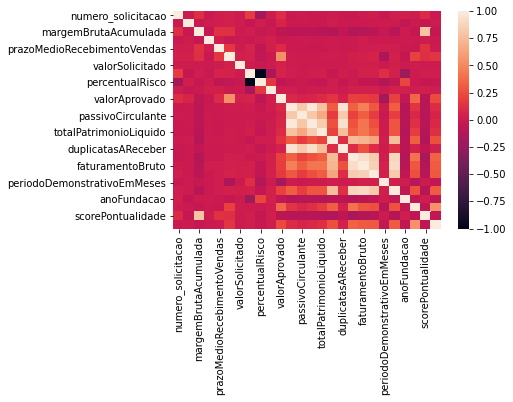

<Figure size 708.661x425.197 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(arquivo.corr())

def cm_to_inch(value):
    return value/2.54
 

 
plt.figure(figsize=(cm_to_inch(25), cm_to_inch(15)))

plt.show()


In [3]:
# load data
data = arquivo

X, y = arquivo.drop(['valorAprovado'], axis=1), arquivo.valorAprovado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 35.95it/s]


In [1]:
predictions.head()

NameError: ignored